In [1]:
#Importing libraries and data
import pandas as pd
import matplotlib.pyplot as plt
from scipy import stats
from scipy.stats import f_oneway
import warnings
warnings.filterwarnings("ignore")

In [2]:
data= pd.read_csv('Sales_data_zone_wise.csv')
data

,Month,Zone - A,Zone - B,Zone - C,Zone - D
0,Month - 1,1483525,1748451,1523308,2267260
1,Month - 2,1238428,1707421,2212113,1994341
2,Month - 3,1860771,2091194,1282374,1241600
3,Month - 4,1871571,1759617,2290580,2252681
4,Month - 5,1244922,1606010,1818334,1326062
5,Month - 6,1534390,1573128,1751825,2292044
6,Month - 7,1820196,1992031,1786826,1688055
7,Month - 8,1625696,1665534,2161754,2363315
8,Month - 9,1652644,1873402,1755290,1422059
9,Month - 10,1852450,1913059,1754314,1608387


### 1. The mean sales generated by each zone.

In [3]:
#Checking null values and data type
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29 entries, 0 to 28
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Month     29 non-null     object
 1   Zone - A  29 non-null     int64 
 2   Zone - B  29 non-null     int64 
 3   Zone - C  29 non-null     int64 
 4   Zone - D  29 non-null     int64 
dtypes: int64(4), object(1)
memory usage: 1.3+ KB


In [4]:
#Sales mean generated by Zones
data.mean()

Zone - A    1.540493e+06
Zone - B    1.755560e+06
Zone - C    1.772871e+06
Zone - D    1.842927e+06
dtype: float64

Text(0, 0.5, 'Sales')

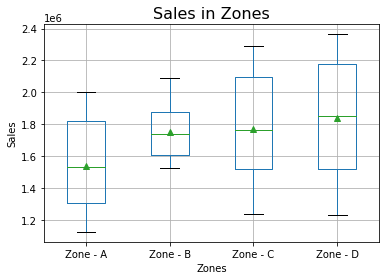

In [5]:
boxplot = data.boxplot(showmeans= True)
boxplot.set_title('Sales in Zones', fontsize=16)
plt.xlabel('Zones')
plt.ylabel('Sales')


### 2. Total sales generated by all the zones for each month.

In [6]:
data_mean = data.sum(axis=1)
data_mean

0     7022544
1     7152303
2     6475939
3     8174449
4     5995328
5     7151387
6     7287108
7     7816299
8     6703395
9     7128210
10    7032783
11    6111084
12    5925424
13    7155515
14    5934156
15    6506659
16    7149383
17    7083490
18    6971953
19    7124599
20    7389597
21    7560001
22    6687919
23    7784747
24    6095918
25    6512360
26    6267918
27    7470920
28    6772277
dtype: int64

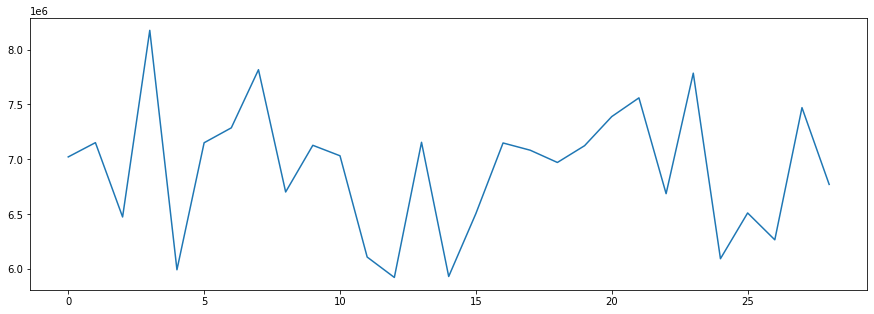

In [7]:
plt.figure(figsize=(15,5))
plt.plot(data_mean, scalex=True, scaley=True)

### 3. Check whether all the zones generate the same amount of sales.

#### Hypotheses

H0: All the zones generate the same amount of sales

Ha: All the zones wouldn't be able to generate the same amount of sales

In [8]:
f_value, p_value = stats.f_oneway(data['Zone - A'], data['Zone - B'], data['Zone - C'], data['Zone - D'])
print("F value =", f_value,"\np value=", p_value)
alpha = 0.05 
if p_value >= alpha:
    print("We fail to reject the null hypothesis based on the sample.")
else:
    print("We fail to accept the null hypothesis based on the sample.")

F value = 5.672056106843581 
p value= 0.0011827601694503335
We fail to accept the null hypothesis based on the sample.


#### Conclusion: All zones have same amount of sales